> This notebook serves as the exploration notebook for the metadata surrounding the images. Here I explore the distribution of types of lesions, ages, localizations and diagnosis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

> Even though I do not use the given pixel csvs in my study, I import them here to see if I can use the pixel counts to gleam anything just for analysis.

In [3]:
data_1 = pd.read_csv("./skin-cancer-mnist-ham10000/pre_processed_data_from_isic/hmnist_8_8_L.csv")

In [4]:
data_2 = pd.read_csv("./skin-cancer-mnist-ham10000/pre_processed_data_from_isic/hmnist_8_8_RGB.csv")

In [5]:
data_3 = pd.read_csv("./skin-cancer-mnist-ham10000/pre_processed_data_from_isic/hmnist_28_28_L.csv")

In [6]:
data_4 = pd.read_csv("./skin-cancer-mnist-ham10000/pre_processed_data_from_isic/hmnist_28_28_RGB.csv")

> Below is the "metadata".

In [7]:
data_info = pd.read_csv("./skin-cancer-mnist-ham10000/HAM10000_metadata.csv")

In [8]:
data_info.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
data_info.shape

(10015, 7)

In [10]:
data_1["label"].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [11]:
data_info["dx"].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

> The "label" column in data_1, \_2, \_3 and \_4 corresponds to the "dx" column in data_info. It is clear from the cells above that our classes are severely imbalanced. This may make classifcation of lesions labeled "df" and "vasc" difficult.

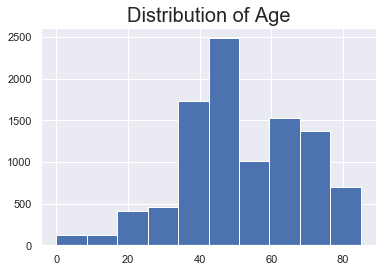

In [12]:
data_info["age"].hist()
plt.title("Distribution of Age", fontdict={"fontsize" : 20});

> Unsurprisingly, the data is skewed left with more representation being above the age of 40.

In [13]:
data_info["sex"].value_counts(normalize = True)

male       0.539790
female     0.454518
unknown    0.005691
Name: sex, dtype: float64

In [14]:
data_info["localization"].value_counts(normalize = True)

back               0.218872
lower extremity    0.207389
trunk              0.140190
upper extremity    0.111633
abdomen            0.102047
face               0.074388
chest              0.040639
foot               0.031852
unknown            0.023365
neck               0.016775
scalp              0.012781
hand               0.008987
ear                0.005592
genital            0.004793
acral              0.000699
Name: localization, dtype: float64

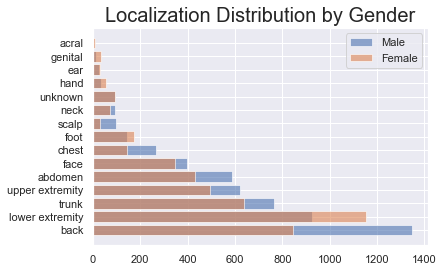

In [15]:
plt.barh(data_info[data_info["sex"] == "male"]["localization"].value_counts().index, 
         data_info[data_info["sex"] == "male"]["localization"].value_counts().values, alpha = 0.6, 
         label = "Male")

plt.barh(data_info[data_info["sex"] == "female"]["localization"].value_counts().index, 
         data_info[data_info["sex"] == "female"]["localization"].value_counts().values, alpha = 0.6,
         label = "Female")

plt.legend()
plt.title("Localization Distribution by Gender", fontdict={"fontsize": 20});

> Gender counts seem to be relatively similar with the exceptions of back and lower extremity.

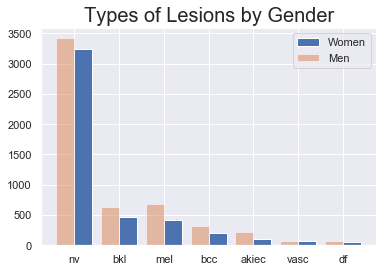

In [16]:
woman_mask = data_info["sex"] == "female"
man_mask = data_info["sex"] == "male"

fig1 = plt.figure()

plt.bar(data_info[woman_mask]["dx"].value_counts().index,
        data_info[woman_mask]["dx"].value_counts().values,
        width = 0.4,
        align = "edge",
        label = "Women")
plt.bar(data_info[man_mask]["dx"].value_counts().index,
        data_info[man_mask]["dx"].value_counts().values,
        width = -0.4,
        align = "edge",
        alpha = .5,
        label = "Men");
plt.title("Types of Lesions by Gender", fontdict= {"fontsize": 20})
plt.legend();
fig1.savefig("class_balance_by_gender.png")

> Below is the "pixel average" for each type of lesion. This was determined by adding up the pixels in each picture and dividing by the total amount. The idea was that maybe some lesions (melanoma) have on average a lower pixel count because they are darker. I use this column along with the rest of the metadata in another notebook to create an XGBoost model.

In [17]:
data_4["pixel_avg"] = data_4.drop("label", axis = 1).sum(axis = 1)/2353

In [18]:
data_4[["pixel_avg", "label"]].groupby("label").mean()

,pixel_avg
label,
0,167.376187
1,171.105030
2,154.915364
3,169.605732
4,159.974369
5,169.787445
6,153.531468


In [19]:
data_info["pixel_avg"] = data_4["pixel_avg"]

In [20]:
data_info.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,pixel_avg
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,184.320017
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,177.003825
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,181.487038
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,165.210795
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,188.305992


In [21]:
data_info.to_csv("descriptive_data.csv")

## Closing Thoughts

> I think that the small number of pictures (10,015) and the imbalanced classes are going to make it challenging to differentiate between images. There is a good balance of men and women, but it should be noted that all pictures seem to be from people with fair skin color.